# Bibliotecas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar a base de dados

In [8]:
file_path = "/content/Vendas.xlsx"
df = pd.read_excel(file_path, sheet_name="Planilha1")
df

,DataEmissao,NFe,cdProduto,Produto,Grupo Produto,Linha Produto,cdVendedor,Vendedor,Supervisor,Gerente,Equipe Vendas,QtdItens,ValorUnitario
0,2019-03-13,2172961,257,Produto 257,Fermentos,Alimentos,215,Carla Ferreira,Diego Araujo,Victor Castro,Varejo,6,4.42
1,2019-03-12,2171374,2472,Produto 2472,Fermentos,Alimentos,326,Julia Silva,Sofia Ribeiro,Gabriel Azevedo,Online,10,1.07
2,2019-03-12,2172788,157,Produto 157,Leite em Pó,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,3,4.16
3,2019-03-12,2172788,210,Produto 210,Farinhas de Trigo,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,30,0.95
4,2019-03-12,2172788,1216,Produto 1216,Farinhas de Trigo,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,30,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574057,2024-09-23,2213301,1960,Produto 1960,Cafe,Bebidas,285,Mateus Costa,Sofia Ribeiro,Gabriel Azevedo,Online,23,0.77
574058,2024-07-21,2156577,592,Produto 592,Fermentos,Laticinios,285,Mateus Costa,Sofia Ribeiro,Gabriel Azevedo,Online,66,0.27
574059,2024-01-21,2283103,1719,Produto 1719,Leite em po,Laticinios,285,Mateus Costa,Sofia Ribeiro,Gabriel Azevedo,Atacado,143,0.12
574060,2024-11-05,2160417,2075,Produto 2075,Laticinios,Alimentos,196,Leonardo Cardoso,Diego Araujo,Victor Castro,Atacado,41,1.43


# Exibir as primeiras linhas

In [9]:
df.head()

,DataEmissao,NFe,cdProduto,Produto,Grupo Produto,Linha Produto,cdVendedor,Vendedor,Supervisor,Gerente,Equipe Vendas,QtdItens,ValorUnitario
0,2019-03-13,2172961,257,Produto 257,Fermentos,Alimentos,215,Carla Ferreira,Diego Araujo,Victor Castro,Varejo,6,4.42
1,2019-03-12,2171374,2472,Produto 2472,Fermentos,Alimentos,326,Julia Silva,Sofia Ribeiro,Gabriel Azevedo,Online,10,1.07
2,2019-03-12,2172788,157,Produto 157,Leite em Pó,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,3,4.16
3,2019-03-12,2172788,210,Produto 210,Farinhas de Trigo,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,30,0.95
4,2019-03-12,2172788,1216,Produto 1216,Farinhas de Trigo,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,30,0.95


# Estatísticas descritivas

In [27]:
df.describe()


,DataEmissao,NFe,cdProduto,cdVendedor,QtdItens,ValorUnitario
count,574062,5.740620e+05,574062.000000,574062.000000,574062.000000,574062.000000
mean,2020-06-15 18:32:06.256049152,2.056924e+06,1422.485646,219.462940,51.190837,4.511581
min,2017-01-12 00:00:00,1.491303e+06,100.000000,102.000000,1.000000,0.030000
25%,2018-06-19 00:00:00,1.962403e+06,662.000000,144.000000,11.000000,0.290000
50%,2019-08-20 00:00:00,2.133026e+06,1444.000000,215.000000,30.000000,1.170000
75%,2022-09-09 00:00:00,2.204416e+06,2208.000000,265.000000,84.000000,2.930000
max,2024-12-31 00:00:00,2.300000e+06,3000.000000,669.000000,9000.000000,197.040000
std,NaN,2.103090e+05,846.727262,97.602563,69.035469,13.051505


# Analisando colunas categóricas

In [30]:
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"\nCategoria '{col}':\n{display(categorical_cols[col].value_counts())}")

,count
Produto,
Produto 157,7472
Produto 235,7121
Produto 1154,6282
Produto 2233,6168
Produto 2445,6085
...,...
Produto 1856,75
Produto 358,71
Produto 955,70



Categoria 'Produto':
None


,count
Grupo Produto,
Fermentos,95383
Farinhas de Trigo,57174
Óleos,54090
Laticinios,50146
Bebidas,50004
Leite em po,49988
Farinhas de trigo,49939
Cafe,49768
Pipocas,17331



Categoria 'Grupo Produto':
None


,count
Linha Produto,
Alimentos,358392
Bebidas,115772
Laticinios,99898



Categoria 'Linha Produto':
None


,count
Vendedor,
Carla Ferreira,129041
Julio Lima,109601
Gustavo Gomes,71289
Felipe Goncalves,68012
Leonardo Cardoso,47637
Julia Silva,36821
Mateus Costa,31610
Gustavo Barros,29707
Estevan Souza,19248



Categoria 'Vendedor':
None


,count
Supervisor,
Diogo Carvalho,200138
Diego Araujo,176678
Sofia Ribeiro,136443
Emily Rocha,45913
Fernando Silva,14890



Categoria 'Supervisor':
None


,count
Gerente,
Gabriel Azevedo,336581
Victor Castro,237481



Categoria 'Gerente':
None


,count
Equipe Vendas,
Varejo,214398
Online,163864
Atacado,104215
Distribuidoras,91585



Categoria 'Equipe Vendas':
None


# Tratamento de dados
Remover linhas com valores nulos

In [11]:
df.dropna(inplace=True)
df

,DataEmissao,NFe,cdProduto,Produto,Grupo Produto,Linha Produto,cdVendedor,Vendedor,Supervisor,Gerente,Equipe Vendas,QtdItens,ValorUnitario
0,2019-03-13,2172961,257,Produto 257,Fermentos,Alimentos,215,Carla Ferreira,Diego Araujo,Victor Castro,Varejo,6,4.42
1,2019-03-12,2171374,2472,Produto 2472,Fermentos,Alimentos,326,Julia Silva,Sofia Ribeiro,Gabriel Azevedo,Online,10,1.07
2,2019-03-12,2172788,157,Produto 157,Leite em Pó,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,3,4.16
3,2019-03-12,2172788,210,Produto 210,Farinhas de Trigo,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,30,0.95
4,2019-03-12,2172788,1216,Produto 1216,Farinhas de Trigo,Alimentos,102,Gustavo Barros,Emily Rocha,Victor Castro,Varejo,30,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574057,2024-09-23,2213301,1960,Produto 1960,Cafe,Bebidas,285,Mateus Costa,Sofia Ribeiro,Gabriel Azevedo,Online,23,0.77
574058,2024-07-21,2156577,592,Produto 592,Fermentos,Laticinios,285,Mateus Costa,Sofia Ribeiro,Gabriel Azevedo,Online,66,0.27
574059,2024-01-21,2283103,1719,Produto 1719,Leite em po,Laticinios,285,Mateus Costa,Sofia Ribeiro,Gabriel Azevedo,Atacado,143,0.12
574060,2024-11-05,2160417,2075,Produto 2075,Laticinios,Alimentos,196,Leonardo Cardoso,Diego Araujo,Victor Castro,Atacado,41,1.43


# Verificar valores nulos

In [12]:
print("Valores nulos:")
print(df.isnull().sum())

Valores nulos:
DataEmissao      0
NFe              0
cdProduto        0
Produto          0
Grupo Produto    0
Linha Produto    0
cdVendedor       0
Vendedor         0
Supervisor       0
Gerente          0
Equipe Vendas    0
QtdItens         0
ValorUnitario    0
dtype: int64


# Conversão de tipos

In [13]:
df['DataEmissao'] = pd.to_datetime(df['DataEmissao'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574062 entries, 0 to 574061
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DataEmissao    574062 non-null  datetime64[ns]
 1   NFe            574062 non-null  int64         
 2   cdProduto      574062 non-null  int64         
 3   Produto        574062 non-null  object        
 4   Grupo Produto  574062 non-null  object        
 5   Linha Produto  574062 non-null  object        
 6   cdVendedor     574062 non-null  int64         
 7   Vendedor       574062 non-null  object        
 8   Supervisor     574062 non-null  object        
 9   Gerente        574062 non-null  object        
 10  Equipe Vendas  574062 non-null  object        
 11  QtdItens       574062 non-null  int64         
 12  ValorUnitario  574062 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 56.9+ MB


# Análise Exploratória de Dados (EDA)



In [15]:
df.columns

Index(['DataEmissao', 'NFe', 'cdProduto', 'Produto', 'Grupo Produto',
       'Linha Produto', 'cdVendedor', 'Vendedor', 'Supervisor', 'Gerente',
       'Equipe Vendas', 'QtdItens', 'ValorUnitario'],
      dtype='object')

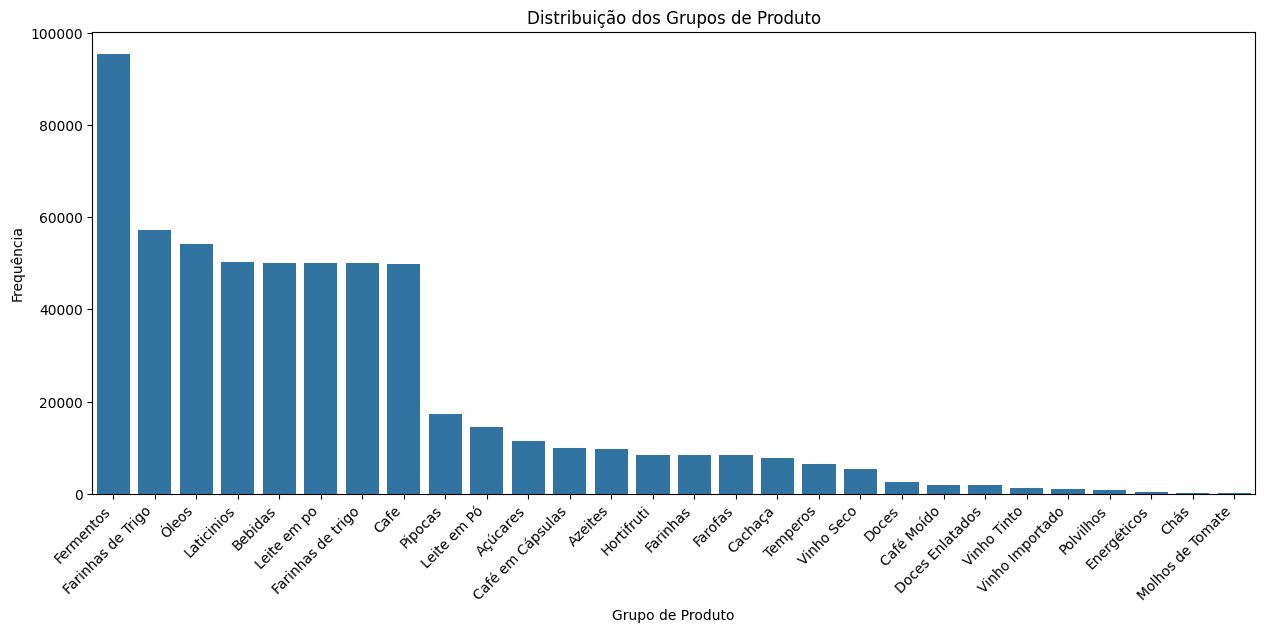

In [16]:
# Análise por Grupo de Produto, Linha do Produto e Produto
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Grupo Produto', order=df['Grupo Produto'].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Distribuição dos Grupos de Produto")
plt.xlabel("Grupo de Produto")
plt.ylabel("Frequência")
plt.show()

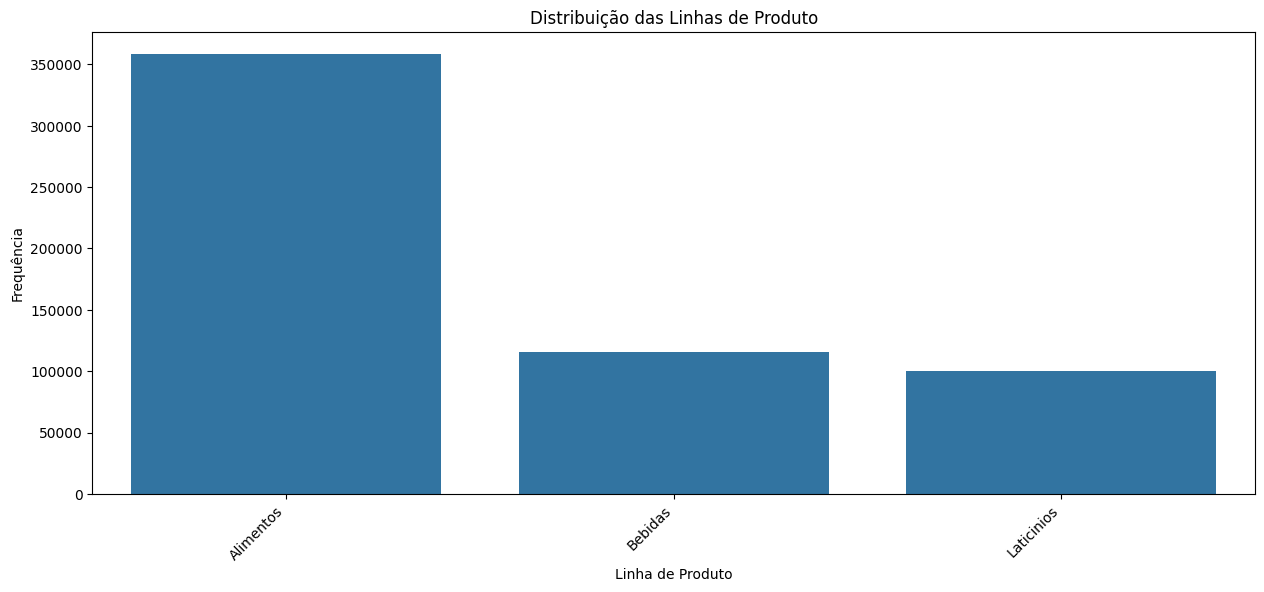

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Linha Produto', order=df['Linha Produto'].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Distribuição das Linhas de Produto")
plt.xlabel("Linha de Produto")
plt.ylabel("Frequência")
plt.show()

# Vendas por Grupo de Produto

In [20]:

vendas_por_grupo = df.groupby('Grupo Produto')['ValorUnitario'].sum().sort_values(ascending=False)
print("Vendas por Grupo de Produto:\n", vendas_por_grupo)


Vendas por Grupo de Produto:
 Grupo Produto
Cachaça              501073.34
Farinhas de Trigo    328888.32
Farofas              268150.14
Óleos                244913.39
Fermentos            211889.47
Leite em Pó          102586.87
Pipocas               92135.30
Azeites               76741.51
Açúcares              76168.46
Café em Cápsulas      69967.03
Farinhas              69261.23
Vinho Importado       66849.80
Café Moído            65468.66
Temperos              64487.84
Hortifruti            59773.89
Doces                 54218.82
Energéticos           33299.11
Bebidas               28047.36
Laticinios            27930.04
Farinhas de trigo     27882.16
Cafe                  27806.18
Leite em po           27722.31
Vinho Seco            21717.76
Vinho Tinto           14208.26
Polvilhos             13979.45
Doces Enlatados       12349.36
Chás                   1533.72
Molhos de Tomate        877.34
Name: ValorUnitario, dtype: float64


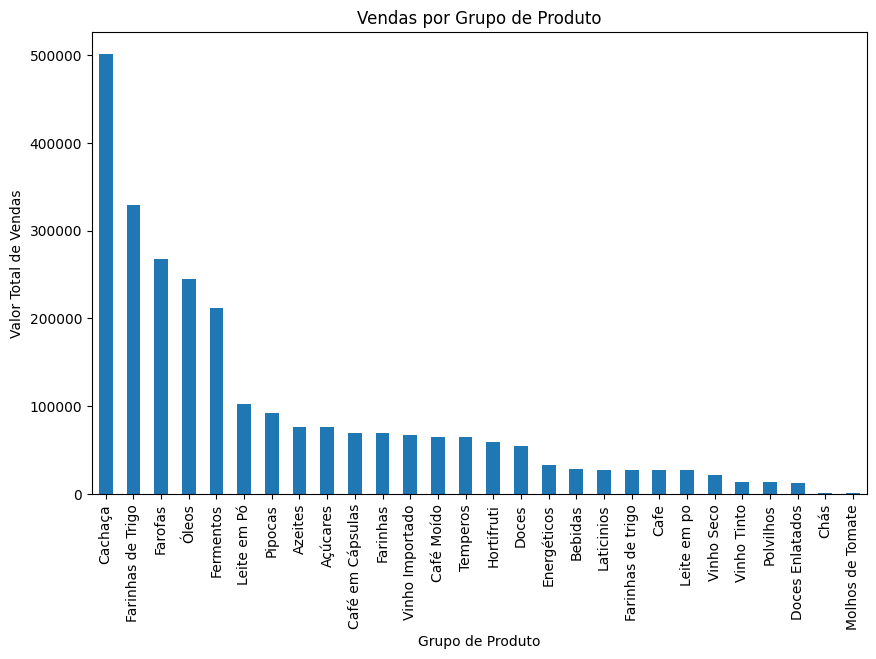

In [23]:
vendas_por_grupo.plot(kind='bar', figsize=(10, 6))
plt.title("Vendas por Grupo de Produto")
plt.xlabel("Grupo de Produto")
plt.ylabel("Valor Total de Vendas")
plt.show()


# Vendas por Vendedor


In [21]:
vendas_por_vendedor = df.groupby('Vendedor')['ValorUnitario'].sum().sort_values(ascending=False)
print("\nVendas por Vendedor:\n", vendas_por_vendedor)


Vendas por Vendedor:
 Vendedor
Julio Lima          448261.14
Carla Ferreira      442325.30
Kaua Araujo         368830.36
Gustavo Gomes       314089.47
Felipe Goncalves    219903.37
Leonardo Cardoso    158176.69
Julia Silva         146623.21
Mateus Costa        127135.94
Gustavo Barros      125742.26
Isabella Sousa      110588.23
Estevan Souza       108407.33
Julieta Gomes        19843.82
Name: ValorUnitario, dtype: float64


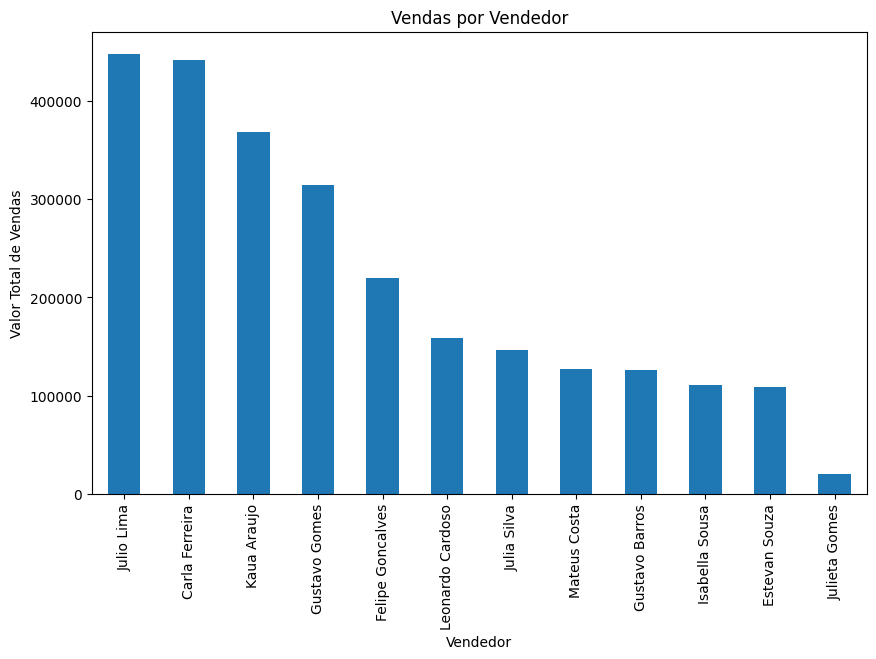

In [24]:
vendas_por_vendedor.plot(kind='bar', figsize=(10, 6))
plt.title("Vendas por Vendedor")
plt.xlabel("Vendedor")
plt.ylabel("Valor Total de Vendas")
plt.show()

In [26]:

# Remover outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [27]:

df_filtered = remove_outliers(df, 'QtdItens')
df_filtered = remove_outliers(df_filtered, 'ValorUnitario')

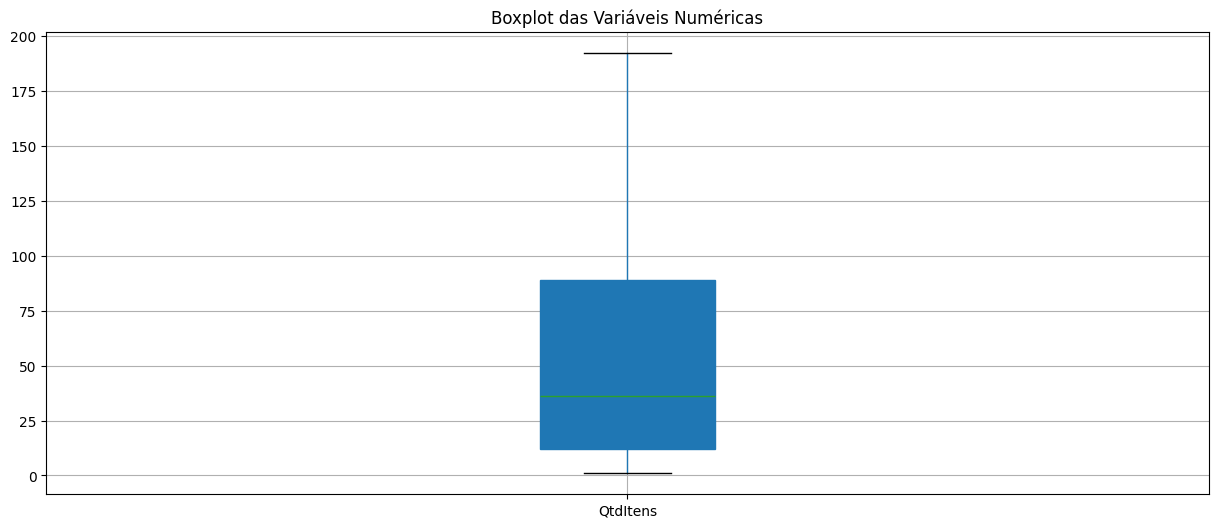

In [36]:
plt.figure(figsize=(15, 6))
df_filtered.boxplot(column=['QtdItens'],patch_artist=True)
plt.title("Boxplot das Variáveis Numéricas")
plt.show()


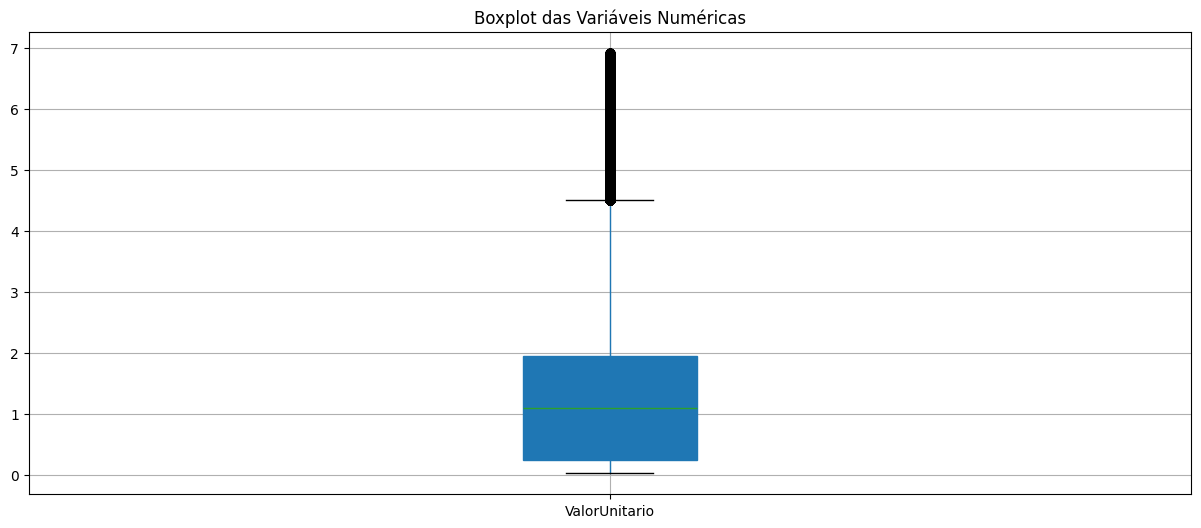

In [35]:
plt.figure(figsize=(15, 6))
df_filtered.boxplot(column=['ValorUnitario'],patch_artist=True)
plt.title("Boxplot das Variáveis Numéricas")
plt.show()


In [44]:
print("Q1 - Primeiro Quartil:", df_filtered["ValorUnitario"].quantile(.25))
print("Q2 - Segundo Quartil:", df_filtered["ValorUnitario"].quantile(.5))
print("Q3 - Terceiro Quartil:", df_filtered["ValorUnitario"].quantile(.75))

Q1 - Primeiro Quartil: 0.25
Q2 - Segundo Quartil: 1.1
Q3 - Terceiro Quartil: 1.95


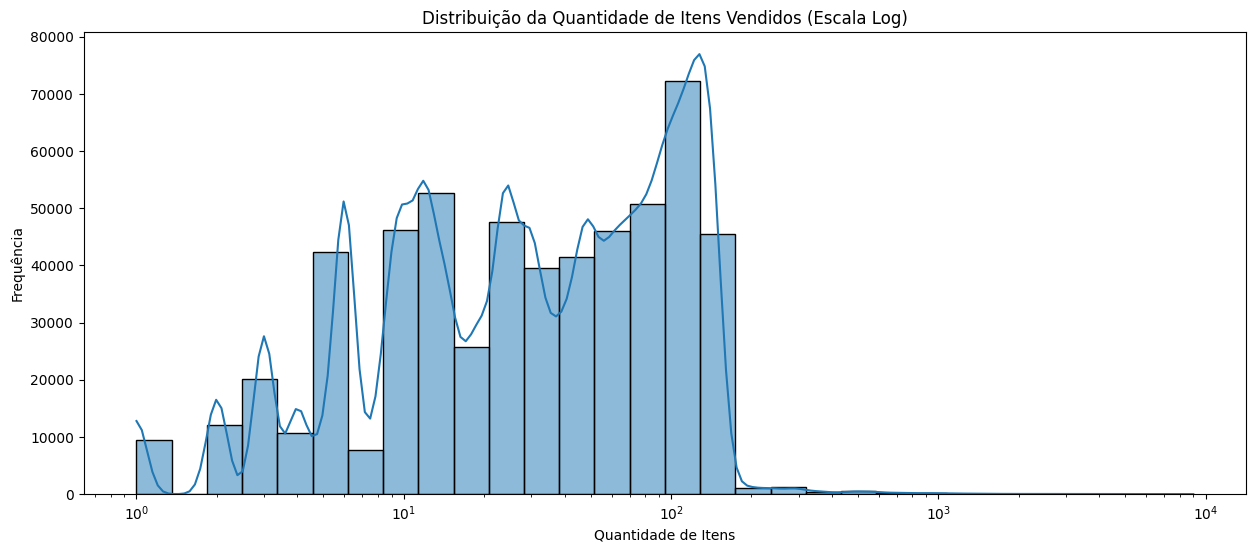

In [23]:
plt.figure(figsize=(15, 6))
sns.histplot(df['QtdItens'], bins=30, kde=True, log_scale=True)
plt.title("Distribuição da Quantidade de Itens Vendidos (Escala Log)")
plt.xlabel("Quantidade de Itens")
plt.ylabel("Frequência")
plt.show()

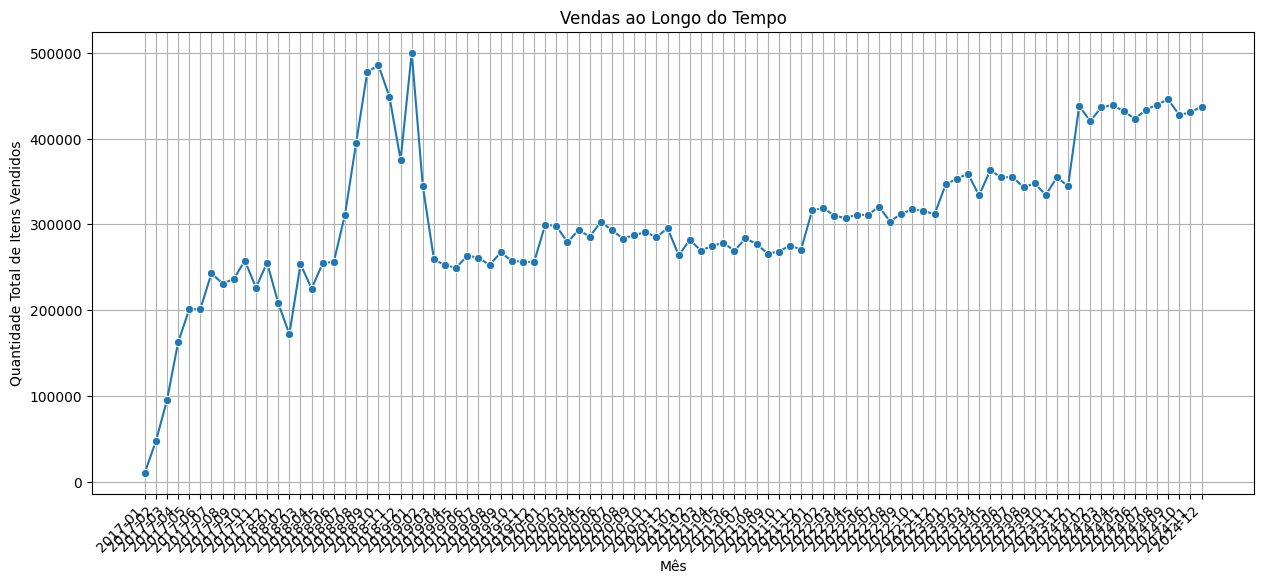

In [25]:
# Distribuição de vendas ao longo do tempo
df_time_series = df.groupby(df['DataEmissao'].dt.to_period("M")).agg({"QtdItens": "sum"}).reset_index()
df_time_series['DataEmissao'] = df_time_series['DataEmissao'].astype(str)
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_time_series, x="DataEmissao", y="QtdItens", marker="o")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Mês")
plt.ylabel("Quantidade Total de Itens Vendidos")
plt.title("Vendas ao Longo do Tempo")
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['QtdItens', 'ValorUnitario']])
plt.title("Boxplot das Variáveis Numéricas")
plt.show()

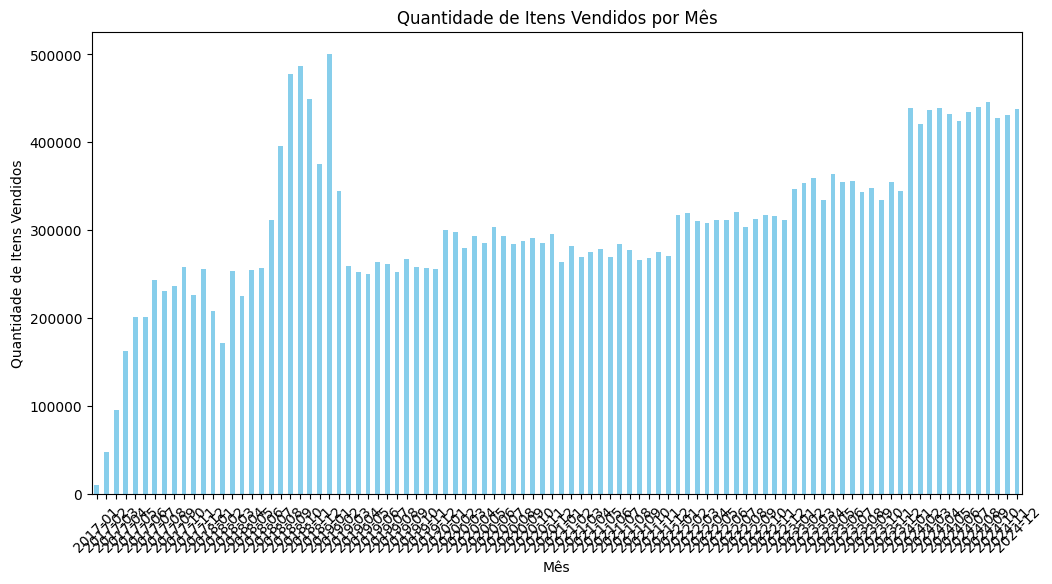

In [18]:
plt.figure(figsize=(12, 6))
df.groupby(df['DataEmissao'].dt.to_period('M'))['QtdItens'].sum().plot(kind='bar', color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Itens Vendidos')
plt.title('Quantidade de Itens Vendidos por Mês')
plt.xticks(rotation=45)
plt.show()

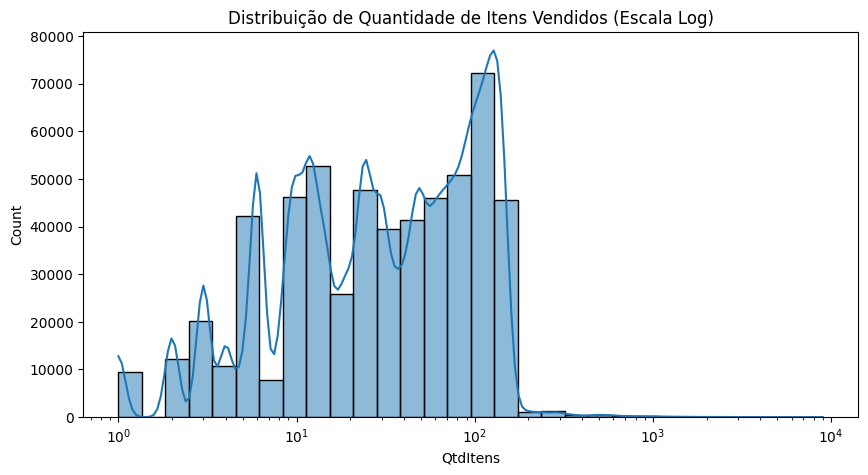

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['QtdItens'], bins=30, kde=True, log_scale=(True, False))  # Escala logarítmica no eixo X
plt.title('Distribuição de Quantidade de Itens Vendidos (Escala Log)')
plt.show()

# Selecionar apenas colunas numéricas para a correlação

In [15]:
numeric_cols = df.select_dtypes(include=['number'])

In [19]:
cols_to_exclude = ['NFe', 'cdProduto']  # Colunas que não fazem sentido na matriz de correlação
numeric_cols = df.select_dtypes(include=['number']).drop(columns=cols_to_exclude, errors='ignore')


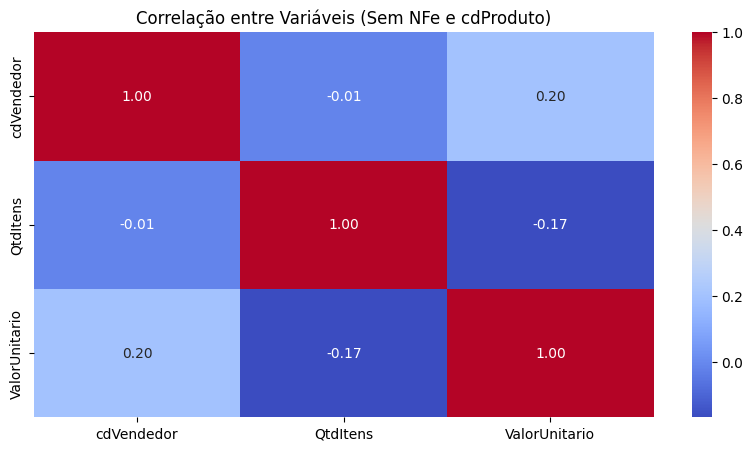

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis (Sem NFe e cdProduto)')
plt.show()

In [33]:
correlacao = df['QtdItens'].corr(df['ValorUnitario'])
print(f"Correlação entre QtdItens e ValorUnitario: {correlacao}")


Correlação entre QtdItens e ValorUnitario: -0.16913148900924588


A correlação de -0,1691 entre QtdItens (quantidade de itens vendidos) e ValorUnitario (preço unitário) indica uma correlação fraca.

In [34]:
correlacao = df['cdVendedor'].corr(df['ValorUnitario'])
print(f"Correlação entre cdVendedor e ValorUnitario: {correlacao}")

Correlação entre cdVendedor e ValorUnitario: 0.19882811311354257


A correlação 0.1988 o valor sugere que existe uma leve relação positiva, mas não é forte o suficiente para afirmar que uma variável causa um grande impacto sobre a outra.

# Dados de vendas ao longo do tempo

<ipython-input-32-10f6b1f3c91f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_por_mes = vendas_por_dia.resample('M').sum()


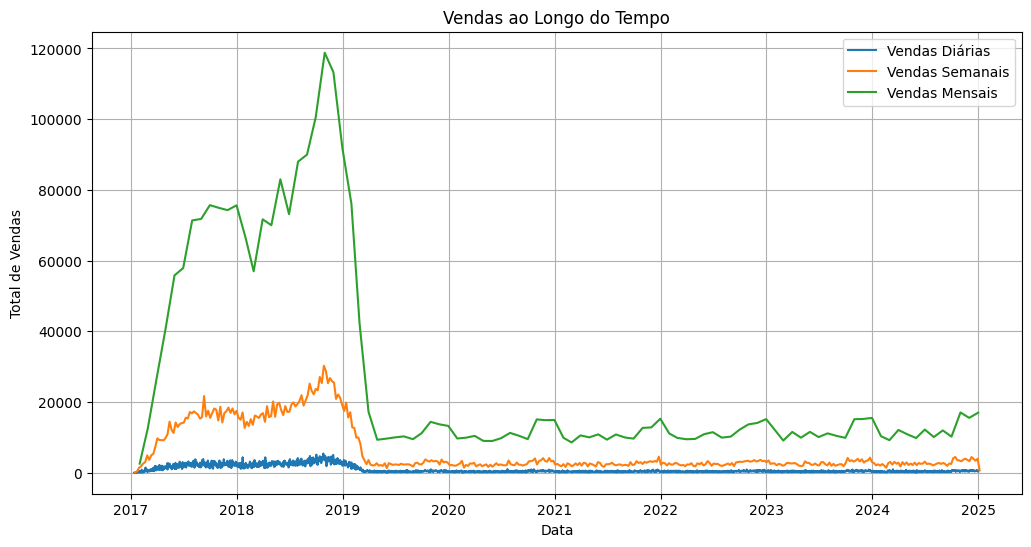

In [32]:
vendas_por_dia = df.groupby('DataEmissao')['ValorUnitario'].sum()
vendas_por_semana = vendas_por_dia.resample('W').sum()
vendas_por_mes = vendas_por_dia.resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(vendas_por_dia.index, vendas_por_dia.values, label='Vendas Diárias')
plt.plot(vendas_por_semana.index, vendas_por_semana.values, label='Vendas Semanais')
plt.plot(vendas_por_mes.index, vendas_por_mes.values, label='Vendas Mensais')

plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.title('Vendas ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()


# Relação entre Quantidade de Vendas e Preço Unitário

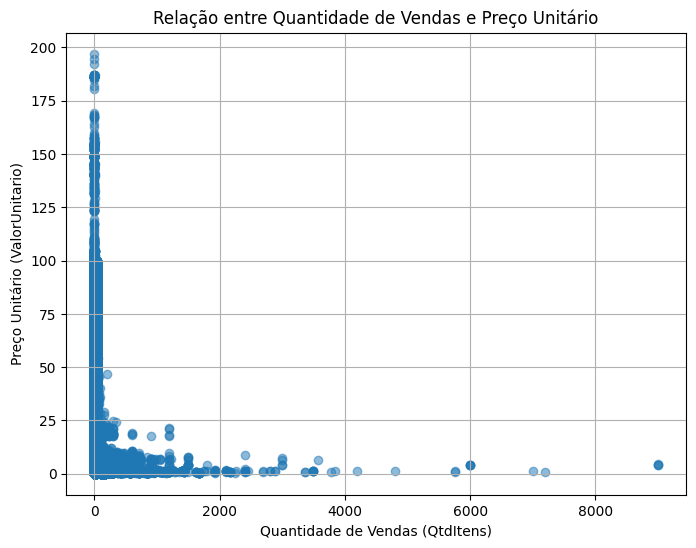

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['QtdItens'], df['ValorUnitario'], alpha=0.5)
plt.xlabel('Quantidade de Vendas (QtdItens)')
plt.ylabel('Preço Unitário (ValorUnitario)')
plt.title('Relação entre Quantidade de Vendas e Preço Unitário')
plt.grid(True)
plt.show()

## Descobertas do EDA

O conjunto de dados analisado possui um total de **574.062 linhas** e **13 colunas**, abrangendo informações sobre notas fiscais, produtos, vendedores e equipes de vendas.  

As colunas podem ser classificadas em três tipos principais. As **colunas numéricas**, como 'NFe', 'cdProduto', 'cdVendedor', 'QtdItens' e 'ValorUnitario', armazenam valores inteiros e decimais. As **colunas categóricas**, representadas como texto, incluem 'Produto', 'Grupo Produto', 'Linha Produto', 'Vendedor', 'Supervisor', 'Gerente' e 'Equipe Vendas'. Além disso, há uma **coluna de data/hora**, 'DataEmissao', que registra o momento da emissão das notas fiscais.  

Um ponto positivo do conjunto de dados é que **não há valores ausentes** em nenhuma das colunas, garantindo integridade na análise.  

Na avaliação das colunas numéricas, observa-se que os números das notas fiscais variam entre **1.491.303 e 2.300.000**. Os códigos dos produtos vão de **100 a 3.000**, enquanto os códigos dos vendedores ficam entre **102 e 669**. A quantidade de itens por nota fiscal apresenta uma grande variação, indo de **1 a 9.000**, o que sugere a necessidade de uma análise mais detalhada para identificar possíveis outliers. O mesmo ocorre com a coluna 'ValorUnitario', cujo intervalo varia de **0,03 a 197,04**, também levantando a hipótese de valores atípicos.  

Nas colunas categóricas, foram identificados **2.901 produtos únicos**, sendo que alguns aparecem com uma frequência significativamente maior do que outros. Os produtos estão organizados em diversos grupos, com **'Fermentos'** sendo o mais frequente. Já na classificação por linha de produto, existem três categorias principais: **'Alimentos', 'Bebidas' e 'Laticínios'**, com destaque para a linha de **Alimentos**, que possui a maior quantidade de registros.  

Em relação aos vendedores, o conjunto de dados conta com **12 profissionais distintos**, mas as vendas não são distribuídas de forma equilibrada entre eles. Destacam-se **Carla Ferreira** e **Julio Lima**, que possuem os maiores volumes de vendas. Além disso, há **5 supervisores**, **2 gerentes** e **4 equipes de vendas** atuando na comercialização dos produtos.  



# Análise de Desempenho de Vendas por Categoria
Analisei o desempenho de vendas por diferentes categorias. Calculei três principais métricas para cada categoria:

- **Vendas Totais**: Soma de todas as vendas de cada categoria.
- **Quantidade Média de Vendas**: Média de itens vendidos por categoria.
- **Preço Médio Unitário**: Média do preço de venda por categoria.

A análise é feita para as seguintes categorias: **Produto**, **Grupo de Produto**, **Vendedor**, **Supervisor**, **Gerente**, **Equipe de Vendas**.

O objetivo é identificar quais categorias (produtos, vendedores, equipes) estão gerando mais vendas e entender melhor o desempenho de vendas de cada uma delas.

Foi agrupado os dados por categoria (como **Produto** ou **Vendedor**), calcula as métricas de **Vendas Totais**, **Quantidade Média de Vendas** e **Preço Médio Unitário** para cada categoria e exibe as 10 categorias com as maiores **Vendas Totais**. Essas informações ajudam a destacar os melhores desempenhos e entender onde há mais potencial de crescimento.


In [36]:
for col in ['Produto', 'Grupo Produto', 'Linha Produto', 'Vendedor', 'Supervisor', 'Gerente', 'Equipe Vendas']:
    resumo_vendas = df.groupby(col).agg(
        Vendas_Totais=('ValorUnitario', 'sum'),
        Quantidade_Media_Vendas=('QtdItens', 'mean'),
        Preco_Medio_Unitario=('ValorUnitario', 'mean'),
    )
    display(resumo_vendas.sort_values(by='Vendas_Totais', ascending=False).head(10))

,Vendas_Totais,Quantidade_Media_Vendas,Preco_Medio_Unitario
Produto,,,
Produto 2392,80891.34,11.570010,80.329037
Produto 1839,56716.00,10.159521,35.760404
Produto 157,49528.13,9.191247,6.628497
Produto 2103,40828.63,16.872375,65.959015
Produto 1842,37051.39,11.355459,32.359293
Produto 2105,33222.30,19.581633,67.800612
Produto 1206,32114.96,18.432323,64.878707
Produto 1154,31878.94,12.842725,5.074648
Produto 1783,30397.65,20.472648,66.515646


,Vendas_Totais,Quantidade_Media_Vendas,Preco_Medio_Unitario
Grupo Produto,,,
Cachaça,501073.34,4.783999,64.347417
Farinhas de Trigo,328888.32,35.965246,5.752411
Farofas,268150.14,4.380292,32.067704
Óleos,244913.39,28.273045,4.527887
Fermentos,211889.47,57.078955,2.221459
Leite em Pó,102586.87,8.622389,7.049675
Pipocas,92135.30,10.978362,5.316214
Azeites,76741.51,15.263718,7.856420
Açúcares,76168.46,11.272893,6.598671


,Vendas_Totais,Quantidade_Media_Vendas,Preco_Medio_Unitario
Linha Produto,,,
Alimentos,1839859.76,39.479380,5.133652
Bebidas,694628.21,66.500674,5.999967
Laticinios,55439.15,75.464013,0.554958


,Vendas_Totais,Quantidade_Media_Vendas,Preco_Medio_Unitario
Vendedor,,,
Julio Lima,448261.14,49.832109,4.089937
Carla Ferreira,442325.30,52.006758,3.427789
Kaua Araujo,368830.36,43.695970,24.770340
Gustavo Gomes,314089.47,50.482683,4.405862
Felipe Goncalves,219903.37,51.466477,3.233303
Leonardo Cardoso,158176.69,53.667674,3.320459
Julia Silva,146623.21,51.114853,3.982054
Mateus Costa,127135.94,52.887124,4.022016
Gustavo Barros,125742.26,52.629077,4.232749


,Vendas_Totais,Quantidade_Media_Vendas,Preco_Medio_Unitario
Supervisor,,,
Diogo Carvalho,870757.94,50.424117,4.350788
Diego Araujo,600501.99,52.454584,3.398850
Sofia Ribeiro,493662.52,51.700710,3.618086
Fernando Silva,368830.36,43.695970,24.770340
Emily Rocha,256174.31,50.585412,5.579559


,Vendas_Totais,Quantidade_Media_Vendas,Preco_Medio_Unitario
Gerente,,,
Gabriel Azevedo,1364420.46,50.941622,4.053766
Victor Castro,1225506.66,51.544048,5.160441


,Vendas_Totais,Quantidade_Media_Vendas,Preco_Medio_Unitario
Equipe Vendas,,,
Varejo,1195906.55,49.146475,5.577974
Distribuidoras,606313.03,23.104755,6.620222
Online,513484.17,55.443429,3.133600
Atacado,274223.37,73.392285,2.631323


# Análise de Desempenho de Vendas

### **Produtos**
Produtos como **Produto 2392** geram altas vendas totais, mas com preços mais elevados (80,33 reais). Já **Produto 1839** apresenta um bom volume de vendas, com preços mais baixos (35,76 reais).

### **Grupos de Produtos**
O grupo **Cachaça** tem o maior valor de vendas totais (501.073,34 reais) e preço médio unitário mais alto. **Farinhas de Trigo**, com grande volume de vendas, tem um preço médio mais baixo (5,75 reais).

### **Linhas de Produtos**
**Alimentos** lidera em vendas totais (1.839.859,76 reais) e volume, com preços mais baixos, enquanto **Bebidas** tem um preço unitário um pouco mais alto (6,00 reais).

### **Vendedores**
**Julio Lima** é o líder em vendas totais, com preços acessíveis (4,09 reais), enquanto **Kaua Araujo** se destaca pelo preço médio unitário mais alto (24,77 reais).

### **Supervisores e Gerentes**
**Diogo Carvalho** e **Gabriel Azevedo** têm as maiores vendas totais, equilibrando volume e preço médio unitário. **Fernando Silva** se destaca com um preço unitário mais alto.

### **Equipes de Vendas**
**Varejo** tem as maiores vendas totais (1.195.906,55 reais), com um bom equilíbrio de volume e preço. **Online** gera um volume considerável, mas com preços mais baixos (3,13 reais).

# Conclusão:
Produtos de **baixo preço e alto volume** dominam as vendas, mas produtos e vendedores de **alto valor** também têm um papel significativo. A análise ajuda a identificar áreas de alto desempenho, sendo útil para estratégias futuras de vendas.
